Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import pandas as pd

1. Загрузить файл hr.csv

In [2]:
df = pd.read_csv("hr.csv")
df

# satisfaction_level - уровень удовлетворенности
# last_evaluation - последняя оценка
# number_project - номер проекта
# average_montly_hours - средние часы в месяц
# time_spend_company - стаж работы в компании
# Work_accident - несчастный случай на работе
# left - уволен
# promotion_last_5years - повышения за последние 5 лет
# sales - отдел
# salary - зарплата

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [79]:
df_statistics = df.describe()
df_statistics
#среднее - mean, 
# медиана - 50%, 
# мин/макс - min|max
# сред. отклонение - std

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [116]:
#мода
df_mode = df.mode().reset_index()
df_mode_stat = df_mode[(df_mode['index'] == 0)]
df_mode_stat

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

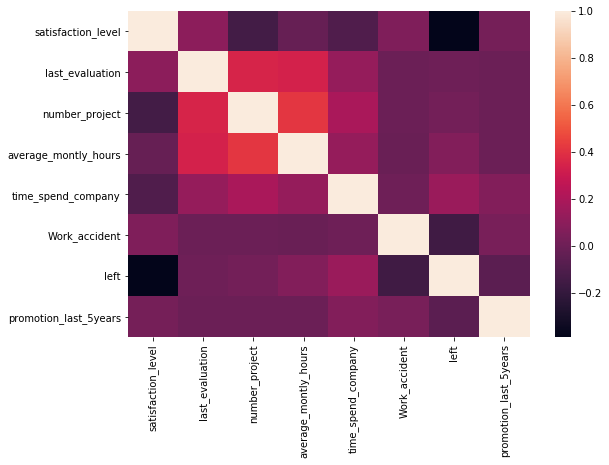

In [317]:
plt.figure(figsize=(9, 6))
corr = df.corr()
sb.heatmap(corr)

Данная матрица отражает совокупность корреляций. 
Сделаем на ее примере выводы о взаимосвязях следующих переменных:
1. Просматривается обратная зависимость между показателем удовлетворенности работой и увольнениями
2. Также наблюдается прямая зависимость между средним отработанным временем и последней оценкой
3. На данной матрице видно зависимость между номером проекта и последней оценкой, а также номером проекта и средним отработанным временем, что является случайной зависимостью.

При увеличении одной переменной вторая увеличивается пропорционально

4. Визуализировать несколько взаимосвязей между переменными

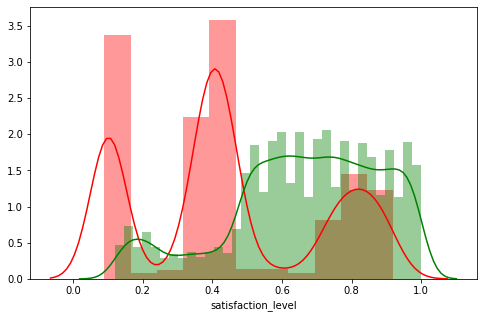

In [348]:
plt.figure(figsize=(8, 5))
sb.distplot(df[df['left'] == 1]['satisfaction_level'], label='Уволенные', color='Red')
sb.distplot(df[df['left'] == 0]['satisfaction_level'], label='Работающие', color='Green')

На графике выше, так же, как и на графике корреляции в задании №3(heatmap), прослеживается зависимость между параметрами left и satisfaction_level. Чем ниже показатель удовлетворенности работника своей работой, тем больше вероятность того, что он уволится

Text(0.5, 1.0, 'Зависимость между отработанным временем и оценкой')

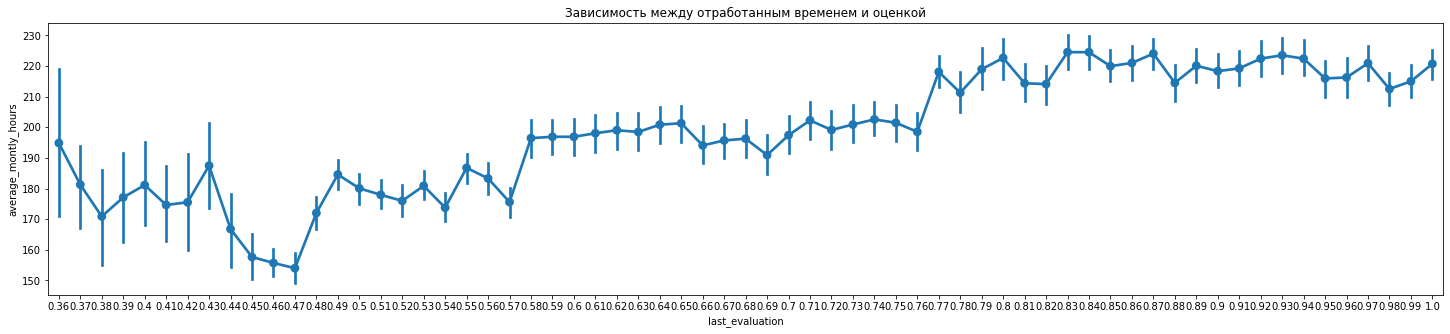

In [366]:
plt.figure(figsize=(25, 5))
sb.pointplot(x = 'last_evaluation', y = 'average_montly_hours', data = df)
plt.title('Зависимость между отработанным временем и оценкой')

Из графика выше видна зависимость между средним количеством отработанного времени и оценкой: Прямая зависимость - чем больше времени провел сотрудник за работой, тем выше оценка

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [6]:
from scipy import stats

In [ ]:
#Проверка гипотезы о взаимосвязи удовлетворения работой и уровнем з/п

Text(0, 0.5, 'Количество')

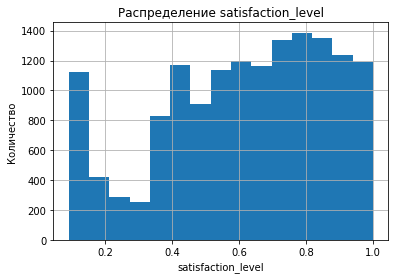

In [17]:
plt.hist(df['satisfaction_level'], 15)
plt.grid(True)
plt.title('Распределение satisfaction_level')
plt.xlabel('satisfaction_level')
plt.ylabel('Количество')

In [13]:
stats.ttest_ind(df[df['salary'] == 'low']['satisfaction_level'], df[df['salary'] == 'high']['satisfaction_level'] )

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)

In [14]:
stats.ttest_ind(df[df['salary'] == 'low']['satisfaction_level'], df[df['salary'] == 'medium']['satisfaction_level'] )

Ttest_indResult(statistic=-4.928592335569859, pvalue=8.378854439781171e-07)

In [15]:
stats.ttest_ind(df[df['salary'] == 'medium']['satisfaction_level'], df[df['salary'] == 'high']['satisfaction_level'] )

Ttest_indResult(statistic=-2.081861364315287, pvalue=0.03738816176204982)

In [ ]:
# Вывод: уровень удовлетворенности зависит от уровня заработной платы.

6. Рассчитать сколько работников работает в каждом департаменте

In [4]:
df_count_workers = df['sales'].value_counts()
df_count_workers

#Численность сотрудников в каждом департаменте:

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

- Наибольшее количество сотрудников работает в отделе sales;
- В отделе management работает наименьшее количество сотрудников

7. Показать распределение сотрудников по зарплатам

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

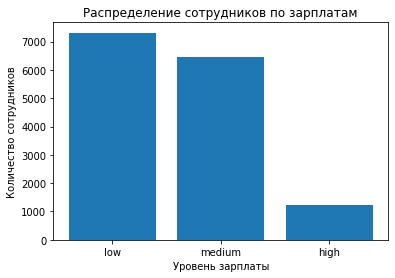

In [9]:
levels_of_salary = df['salary'].value_counts().reset_index()
plt.bar(levels_of_salary['index'], levels_of_salary['salary'])
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')

Визуализация, приведенная выше отображает, что большее количество сотрудников (более 7000 чел) работают за низкую заработную плату. 
Достаточно большое количество сотрудников (~6,5 тыс. чел.) работают за среднюю зарплату. И совсем небольшой процент сотрудников, работающих за высокую плату(чуть более 1тыс чел.)

8. Показать распределение сотрудников по зарплатам совместно с департаментами

Text(0, 0.5, 'Количество сотрудников')

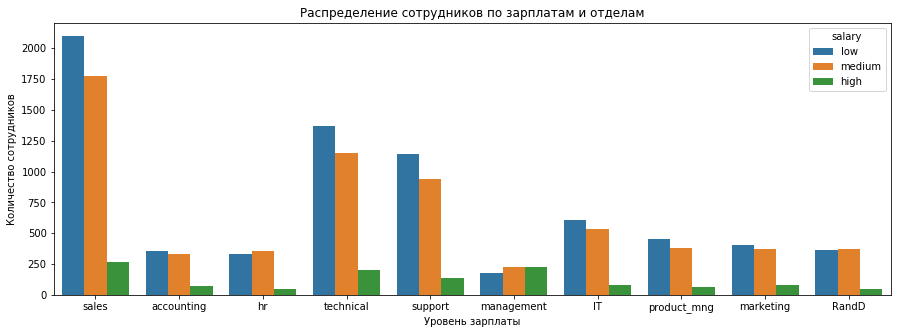

In [307]:
plt.figure(figsize=(15, 5))
sb.countplot(x = 'sales', hue = 'salary', data = df)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')

9. Сколько сотрудников покинули компанию

In [90]:
df_left = df['left'].value_counts().reset_index()
df_left_ = df_left[(df_left['index'] == 1)].left
df_left_

1    3571
Name: left, dtype: int64

Суммарное количество уволенных сотрудников: 3571

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Гипотеза № 1:
    Взаимосвязь между увольнением и стажем работы

Text(0, 0.5, 'Количество')

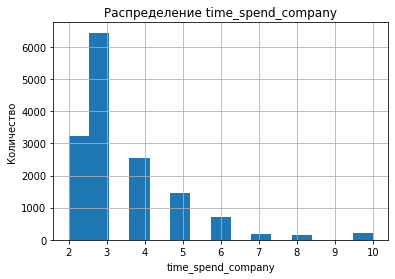

In [59]:
#Проверим распределение по time_spend_company на нормальность

plt.hist(df['time_spend_company'], 15)
plt.grid(True)
plt.title('Распределение time_spend_company')
plt.xlabel('time_spend_company')
plt.ylabel('Количество')

In [60]:
# Нулевая гипотеза: уволенные и оставшиеся сотрудники имели одинаковый стаж работы в компании
    
stats.ttest_ind(df[df['left'] == 1]['time_spend_company'], df[df['left'] == 0]['time_spend_company'])

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

In [61]:
#Вывод: Значение p-value близко к нулевому
# Гипотеза подтверждается
# Сравним средние значения time_spend_company по уволенным сотрудникам и оставшимся:

print(f" уволенные: {df[df['left'] == 1]['time_spend_company'].mean()}")
print(f" оставшиеся: {df[df['left'] == 0]['time_spend_company'].mean()}")

 уволенные: 3.876505180621675
 оставшиеся: 3.3800315015750786


Гипотеза № 2: Взаимосвязь между увольнением и средним количеством отработанного времени в месяц

Text(0, 0.5, 'Количество')

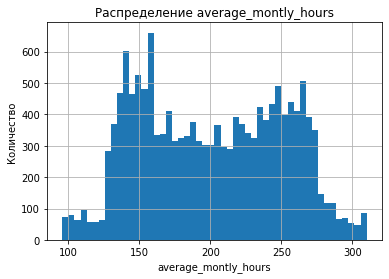

In [64]:
#Проверим распределение по average_montly_hours на нормальность

plt.hist(df['average_montly_hours'], 50)
plt.grid(True)
plt.title('Распределение average_montly_hours')
plt.xlabel('average_montly_hours')
plt.ylabel('Количество')

In [67]:
# гипотеза: уволенные и оставшиеся сотрудники работали одинаковое количество часов
    
stats.ttest_ind(df[df['left'] == 1]['average_montly_hours'], df[df['left'] == 0]['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [66]:
#Вывод: Значение p-value близко к нулевому, гипотеза подтверждается
# Сравним средние значения time_spend_company по уволенным сотрудникам и оставшимся:

print(f" уволенные: {df[df['left'] == 1]['average_montly_hours'].mean()}")
print(f" оставшиеся: {df[df['left'] == 0]['average_montly_hours'].mean()}")

 уволенные: 207.41921030523662
 оставшиеся: 199.0602030101505


Гипотеза № 3: Взаимосвязь между увольнением и последней оценкой

In [93]:
#Средняя оценка по уволенным сотрудникам:

df[df['left'] == 1]['last_evaluation'].mean()

0.7181125735088211

In [83]:
#Средняя оценка по оставшимся сотрудникам:

df[df['left'] == 0]['last_evaluation'].mean()

0.7154733986699335

In [100]:
# Количество работающих сотрудников:

df_stayed = df['left'].value_counts().reset_index()
df_stayed_ = df_left[(df_left['index'] == 0)].left
df_stayed_

0    11428
Name: left, dtype: int64

In [92]:
# Соотношение количества оценок среднего показателя к суммарному количеству уволенных сотрудников

len(df[df['left'] == 1][df['last_evaluation'] >= 0.71])/df_left_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    0.530104
Name: left, dtype: float64

In [99]:
# Соотношение количества оценок среднего показателя к суммарному количеству работающих сотрудников

len(df[df['left'] == 0][df['last_evaluation'] >= 0.71])/df_stayed_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0    0.516363
Name: left, dtype: float64

In [103]:
# Вывод: процентное соотношение показывает, что уволенные сотрудники имели даже бОльшее количество оценок, 
# имеющих среднее значение и выше среднего.
# Значит эти переменные не имеют зависимости друг от друга или имеют очень слабую зависимость

Гипотеза № 4: Взаимосвязь между увольнением и уровнем удовлетворенности

In [104]:
#Средний уровень удовлетворенности уволенных сотрудников:

df[df['left'] == 1]['satisfaction_level'].mean()

0.4400980117614114

In [105]:
#Средний уровень удовлетворенности оставшихся сотрудников:

df[df['left'] == 0]['satisfaction_level'].mean()

0.666809590479524

In [ ]:
# Вывод: у уволенных сотрудников средний уровень удовлетворенности ниже, чем у работающих сотрудников.
# Соответственно, уровень удовлетворенности влияет на увольнение